# Lab 6: nearest neighbors

To illustrate how nearest neighbors can be applied in practice, we will use it to predict the values of [handwritten digits](E-handwritten-digits). We will using the <a href="https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset" target="_blank">digits dataset</a> from Scikit-learn.

In [1]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

X = digits.data        # Flattened 8x8 images (n_samples, 64)
y = digits.target      # Labels 0-9

Let us split the dataset into a training (80%) and a test set (20%). Note: setting the random_state to some value initializes the random number generator used to perform the split to a deterministic value. This is useful if one wants to use a specific split of the data to reproduce a given study. 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To choose $k$ by cross-validation, we will use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank">GridSearchCV</a> object of Scikit-learn.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the kNN model
knn = KNeighborsClassifier()

# Define a list of k values to try
param_grid = {'n_neighbors': list(range(1, 16))}  # k = 1 to 15

# Perform 5-folds cross-validation to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k found by CV:", best_k)

Best k found by CV: 1


Let us plot the average cross-validation score as a function of $k$:

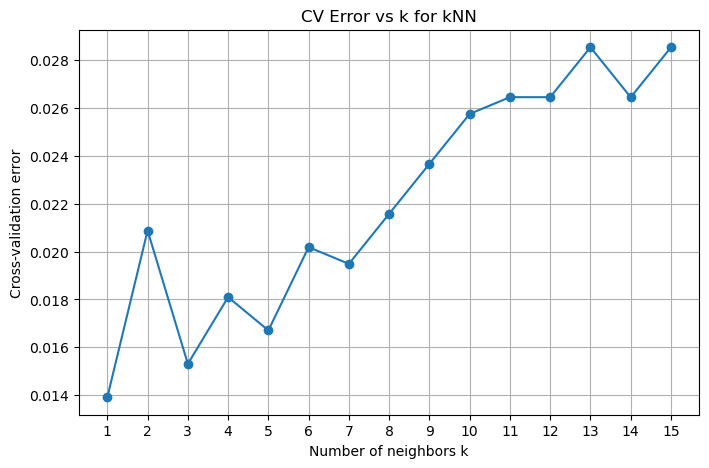

In [10]:
# Extract CV mean accuracy for each k
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors']

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, 1 - mean_scores, marker='o')  # CV error = 1 - accuracy
plt.xlabel("Number of neighbors k")
plt.ylabel("Cross-validation error")
plt.title("CV Error vs k for kNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Finally, we can first the model with the best selected parameter on the whole training set, and measure its performance on the test set that has not been seen before.

In [11]:
# Train kNN with the best k on the full training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate on test set
test_accuracy = best_knn.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.9777777777777777


Even though the nearest neighbors model is very simple, we get a really good test accuracy of about 98%!

```{admonition} Exercise
Using your code from the previous chapter, try other variants of the nearest neighbors approach (e.g., weighted versions) to see if they perform better at the digits classification problem. 
```